In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')


#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [18]:
df = pd.read_csv('cardio.csv', index_col='id', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [22]:
column = []
for a in df['age']:
    age = a//365
    column.append(age)
df['age'] = column
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


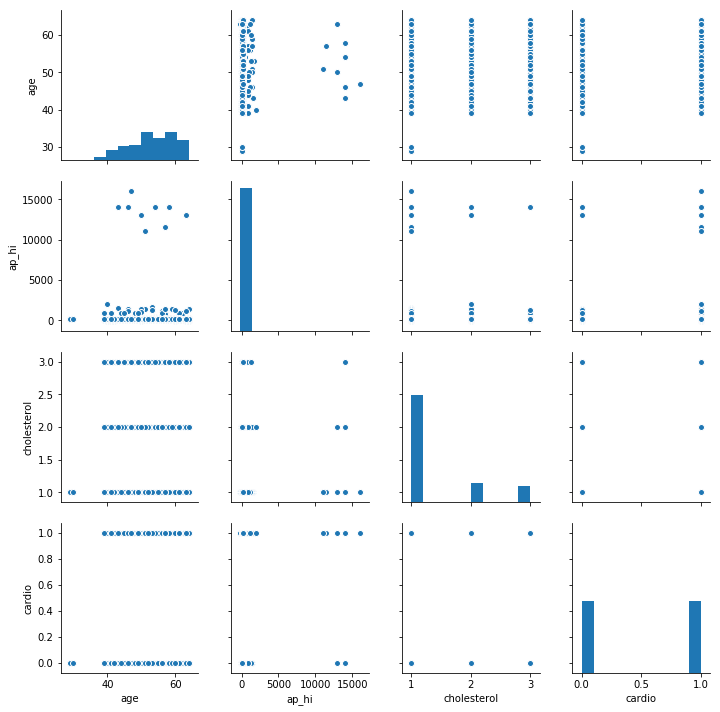

In [24]:
cols = ['age', 'ap_hi', 'cholesterol', 'cardio']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

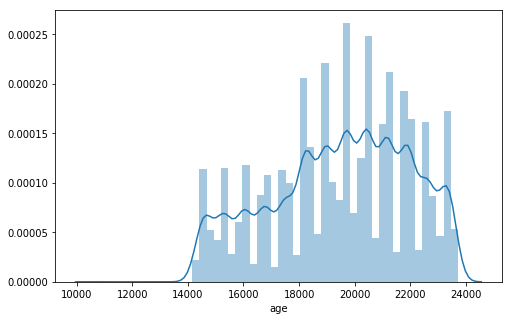

In [11]:
sns.distplot(df.age)

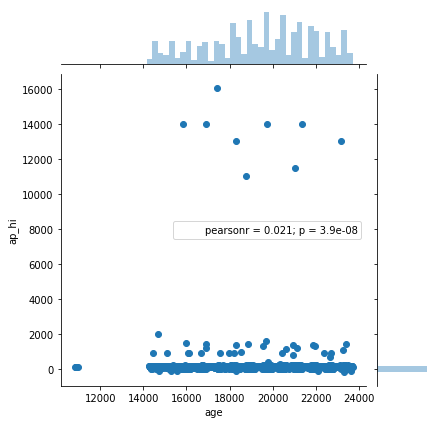

In [13]:
sns.jointplot(df.age, df.ap_hi)

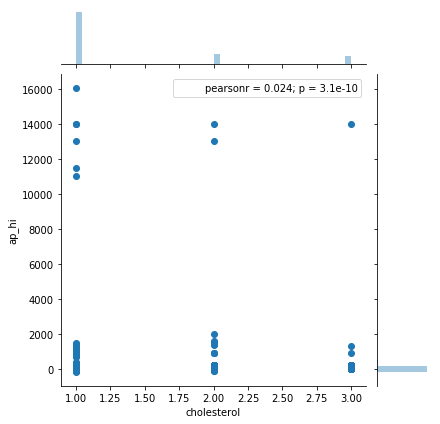

In [14]:
sns.jointplot(df.cholesterol, df.ap_hi)

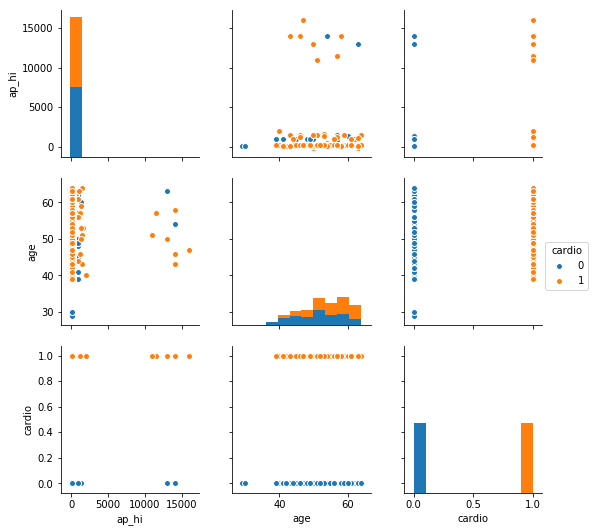

In [34]:
features = list(set(df.columns) - set(['active', 'alco', 'cardio', 'smoke', 'weight','height','gender', 'ap_lo', 'cholesterol', 'gluc']))
#df[features].hist(figsize=(20,12));
sns.pairplot(df[features + ['cardio']], hue='cardio');